### Review

#### Data:
* OriginCountry: [USA, Russia, UK] - Dummy Encode
* DestinationCountry: [USA, Russia, UK] - Dummy Encode
* Prolly start with dice - "dice for dummies" - doesnt count matches of 0s as actual matches

#### Data:
* Do you floss? [True/False]  - Binary
* Drink of choice? [Milk, water coffee] - Dummy
* Prolly start with Jaccard - middle ground of cat data

#### Data:
* Do you floss? [True/False]  - Binary
* Do you get annual checkup? [True/False] - Binary
* Hamming

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

,x,y
0,0.496714,0
1,-0.138264,0
2,0.647689,0
3,1.523030,0
4,-0.234153,0


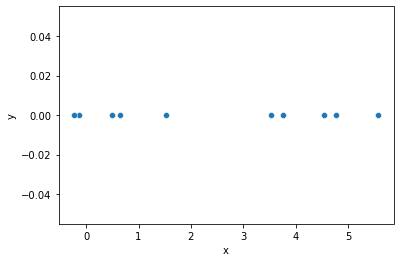

<IPython.core.display.Javascript object>

In [3]:
np.random.seed(42)
a = np.random.normal(0, 1, 5)
b = np.random.normal(4, 1, 5)

df = pd.DataFrame({"x": np.hstack((a, b))})
df["y"] = 0

display(df.head())

sns.scatterplot(x="x", y="y", data=df)
plt.show()

* Choose `k` rows from the dataframe at random to be the initial centroids.
    * Note, that [other implementations](https://en.wikipedia.org/wiki/K-means%2B%2B) will do this a little more rigorously than `k` random points.
* Convert the centroids to a numpy array

In [4]:
k = 2

<IPython.core.display.Javascript object>

In [5]:
centroids = df.sample(2, random_state=42)
centroids_np = centroids.values
centroids

,x,y
8,3.530526,0
1,-0.138264,0


<IPython.core.display.Javascript object>

Here are where the centroids are located that we randomly selected

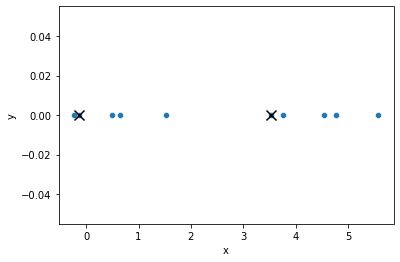

<IPython.core.display.Javascript object>

In [6]:
sns.scatterplot(x="x", y="y", data=df)
plt.scatter(x=centroids_np[:, 0], y=centroids_np[:, 1], marker="x", s=100, c="black")
plt.show()

We want to build towards a for loop to assign each point to a centroid.  For this, we'll use the sum of the squared differences (formula below).

$$\sum_{i=0}^{n}{(x_i - y_i)^2}$$

* $n$ is the total number of features
* $i$ is the current feature index
* $x_i$ is the current feature value for observation $x$
* $y_i$ is the current feature value for observation $y$

The below code chunks have the beginnings of logic we'll use in a `for` loop to compute euclidean distance between each row and each centroid.

In [7]:
X = np.array(df)

# for x in X:
# assign clusters

# create a variable named x
# put the first item from X in x
# this is to 'pretend' we're in the for loop
x = X[0]

<IPython.core.display.Javascript object>

In [8]:
# Take difference between x and centroids
diffs = centroids_np - x
diffs

array([[ 3.03381146,  0.        ],
       [-0.63497845,  0.        ]])

<IPython.core.display.Javascript object>

In [9]:
# Square the differences
sq_diffs = diffs ** 2
sq_diffs

array([[9.20401198, 0.        ],
       [0.40319764, 0.        ]])

<IPython.core.display.Javascript object>

In [10]:
# Sum the squared differences by row
dists = np.sum(sq_diffs, axis=1)
dists

array([9.20401198, 0.40319764])

<IPython.core.display.Javascript object>

In [11]:
# Find the index of the centroid closest to x
# Find the index of the min value
label = dists.argmin()
label

1

<IPython.core.display.Javascript object>

In [12]:
# Use all of the components you just made to build a for loop
# that assigns a label to each row of X
labels = []
for x in X:
    diffs = centroids_np - x
    sq_diffs = diffs ** 2
    dists = np.sum(sq_diffs, axis=1)

    label = dists.argmin()

    labels.append(label)

labels

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

<IPython.core.display.Javascript object>

1. Randomly assigned points to be "centroids"
2. Assign points to their closest centroid

Add the assigned labels as a column in the below dataframe named `assigned_df`.

In [13]:
assigned_df = df.copy()
assigned_df["label"] = labels
assigned_df.head()

,x,y,label
0,0.496714,0,1
1,-0.138264,0,1
2,0.647689,0,1
3,1.523030,0,1
4,-0.234153,0,1


<IPython.core.display.Javascript object>

Replot the data with the points colored by cluster assignment

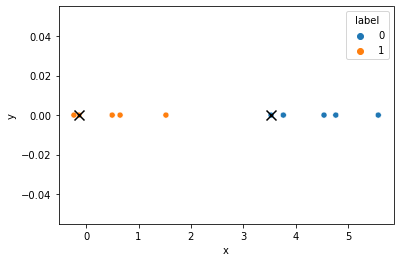

<IPython.core.display.Javascript object>

In [14]:
sns.scatterplot(x="x", y="y", hue="label", data=assigned_df)
plt.scatter(centroids_np[:, 0], centroids_np[:, 1], c="black", marker="x", s=100)
plt.show()

Aggregate `assigned_df` to update the centroids.
* Group by the `'label'` column and take the mean of every other column.
* Convert this output to a numpy array and assign it to `centroids`

In [15]:
assigned_df.groupby("label").mean()

,x,y
label,,
0,4.437119,0
1,0.459003,0


<IPython.core.display.Javascript object>

In [16]:
agg_df = assigned_df.groupby("label").mean()
centroids = agg_df.values
centroids

array([[4.43711925, 0.        ],
       [0.45900297, 0.        ]])

<IPython.core.display.Javascript object>

Replot the data colored by `'label'` with the new centroids.

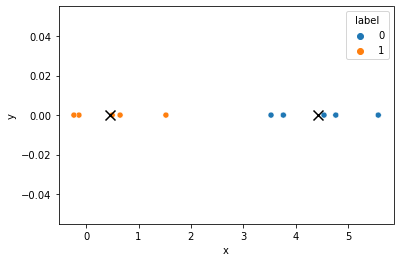

<IPython.core.display.Javascript object>

In [17]:
sns.scatterplot(x="x", y="y", hue="label", data=assigned_df)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
plt.show()

The process we've been doing is rewritten as functions below.  Take a minute to read over the functions and confirm you understand the logic.

In [18]:
def init_centroids(df, k):
    centroids = df.sample(k).values
    return centroids

<IPython.core.display.Javascript object>

In [19]:
def assign_centroids(X, centroids):
    X = np.array(X)
    centroids = np.array(centroids)

    labels = []
    for x in X:
        diffs = x - centroids
        sq_diffs = diffs ** 2
        dists = np.sum(sq_diffs, axis=1)
        label = dists.argmin()
        labels.append(label)

    return labels

<IPython.core.display.Javascript object>

In [20]:
def update_centroids(assigned_df):
    centroid_agg = assigned_df.groupby("label").mean()
    centroids = centroid_agg.values
    return centroids

<IPython.core.display.Javascript object>

In [21]:
def plot_kmeans(df, centroids):
    sns.scatterplot(x="x", y="y", hue="label", data=df)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
    plt.show()

<IPython.core.display.Javascript object>

Use the functions to: 
1. Initialize centroids
* Assign points to centroids
* Plot the current step
* Update centroids

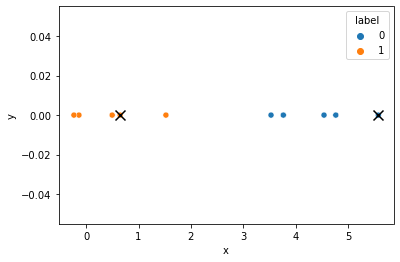

<IPython.core.display.Javascript object>

In [22]:
# Initialize centroids
centroids = init_centroids(df, k)

# Assign points to centroids
labels = assign_centroids(df, centroids)
assigned_df = df.copy()
assigned_df["label"] = labels

# Plot the current step
plot_kmeans(assigned_df, centroids)

# Update centroids
centroids = update_centroids(assigned_df)

## K-Means process

1. Initialize Centroids
2. Assign points to centroids
    * Assign to centroid closest by euclidean distance (only makes sense for numeric data)
3. Update centroids
    * Average data grouped by label (only makes sense for numeric)
4. Assign points to centroids
5. Update centroids
6. And repeat
    * Stop if:
        * Max number of iterations reached
        * Algorithm has converged (ie nothings changed in the past few iterations)
        
#### **Final step: Interpret the results**

Write a for loop to perform the assigning, plotting, and updating `n` times.

In [23]:
n = 4
centroids = init_centroids(df, 2)

<IPython.core.display.Javascript object>

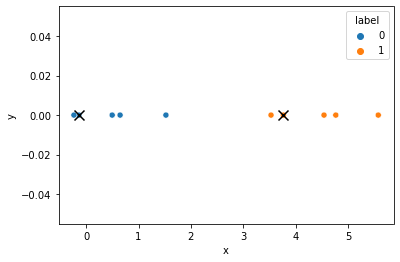

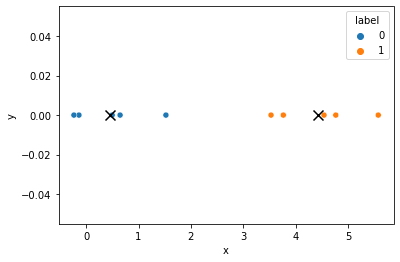

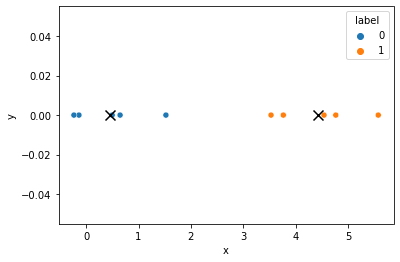

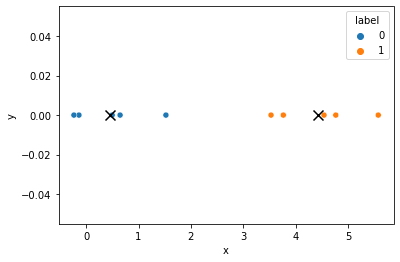

<IPython.core.display.Javascript object>

In [24]:
for _ in range(n):
    labels = assign_centroids(df, centroids)

    assigned_df = df.copy()
    assigned_df["label"] = labels

    plot_kmeans(assigned_df, centroids)
    centroids = update_centroids(assigned_df)

Boom! That's a bonified k-means algorithm.  For extra practice you might:
* Re-do the process with random `y` values instead of all 0s
    * The same code should work
* Re-do the process with a 3rd feature, `z`
    * The same code should work (i think), but the plotting will only show `x` and `y`
* Wrap the whole process up in a single function or class.  Feature requests below:
    * Give the user the option to turn plots on/off
    * Give the user the option to pass in a `random_state` that is used during centroid initialization
    * Give the user the option to specify a maximum number of iterations before the algorithm stops
    * Cause the algorithm to stop early if the centroids didn't change (i.e. it's converged)

Now let's do it the `sklearn` way.

In [25]:
data_url = "https://docs.google.com/spreadsheets/d/1RJrLftlRnj6gmrYewqxykVKSyl7aV-Ktd3sUNQILidM/export?format=csv"
startup = pd.read_csv(data_url)
startup = startup.drop(columns="State")
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<IPython.core.display.Javascript object>

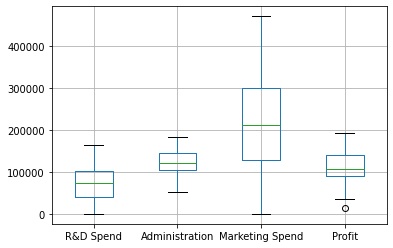

<IPython.core.display.Javascript object>

In [26]:
startup.boxplot()
plt.show()

* Create a scaled version of the data with `StandardScaler()`
* Initialize a `KMeans` instance with `k` clusters.
* `.fit()` it to the `scaled` data

In [27]:
k = 4

<IPython.core.display.Javascript object>

In [28]:
# Scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(startup)
scaled_df = pd.DataFrame(scaled, columns=startup.columns)
scaled_df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


<IPython.core.display.Javascript object>

In [29]:
# Fit kmeans
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_df)

KMeans(n_clusters=4)

<IPython.core.display.Javascript object>

* Unscale the `clst.cluster_centers_` using your `StandardScaler` instance.  We do this for interpretation purposes; it's much easier to translate the numbers back in their original dollars and cents values.
* Save the unscaled centroids to a dataframe with the same names as the `startup` dataframe

In [30]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=startup.columns)
centroids_df.style.background_gradient()

,R&D Spend,Administration,Marketing Spend,Profit
0,30296.310000,89299.086667,162131.340833,73448.101667
1,98022.026111,127743.414444,276077.829444,131841.808333
2,47027.395000,142640.157857,85745.092857,90351.204286
3,149957.510000,116549.878333,405974.428333,180197.555000


<IPython.core.display.Javascript object>

* Interpret the output; try and give names to these clusters that represent their members
* Don't just look at the numbers; visualize the centroids somehow.  
    * A plot?
    * A formatted table?

In [31]:
startup_copy = startup.copy()
startup_copy["label"] = kmeans.labels_
startup_copy["label"] = "Cluster: " + startup_copy["label"].astype(str)
startup_copy.head()

,R&D Spend,Administration,Marketing Spend,Profit,label
0,165349.20,136897.80,471784.10,192261.83,Cluster: 3
1,162597.70,151377.59,443898.53,191792.06,Cluster: 3
2,153441.51,101145.55,407934.54,191050.39,Cluster: 3
3,144372.41,118671.85,383199.62,182901.99,Cluster: 3
4,142107.34,91391.77,366168.42,166187.94,Cluster: 3


<IPython.core.display.Javascript object>

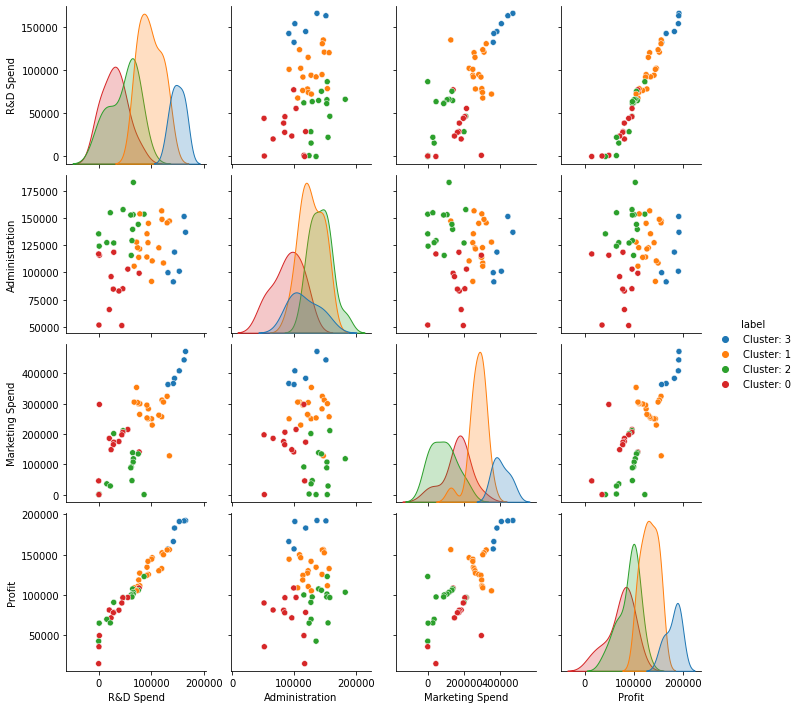

<IPython.core.display.Javascript object>

In [32]:
# pairplot colored by cluster
sns.pairplot(startup_copy, hue="label")
plt.show()

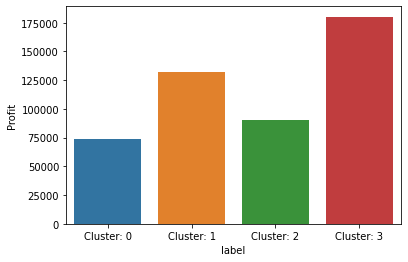

<IPython.core.display.Javascript object>

In [34]:
# barchart
centroids_2 = startup_copy.groupby("label").mean()
centroids_2 = centroids_2.reset_index()

sns.barplot(x="label", y="Profit", data=centroids_2)
plt.show()